<h2>Exploratory Data Analysis</h2>

In [68]:
import pandas as pd
import numpy as np
import requests
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm

In [2]:
books_df = pd.read_csv(r"C:\Users\rafal\OneDrive - Syracuse University\IST 718\Project\booksdf_project.csv")
books_df.head()

,book_id,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_month,publication_day,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,September,Saturday,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,September,Wednesday,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic,November,Saturday,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,May,Saturday,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic,September,Monday,2004


In [74]:
books_df.dtypes

book_id                 int64
title                  object
authors                object
average_rating        float64
language_code          object
num_pages               int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
publication_month      object
publication_day        object
publication_year        int64
dtype: object

<h4>Correlation Matrix</h4>

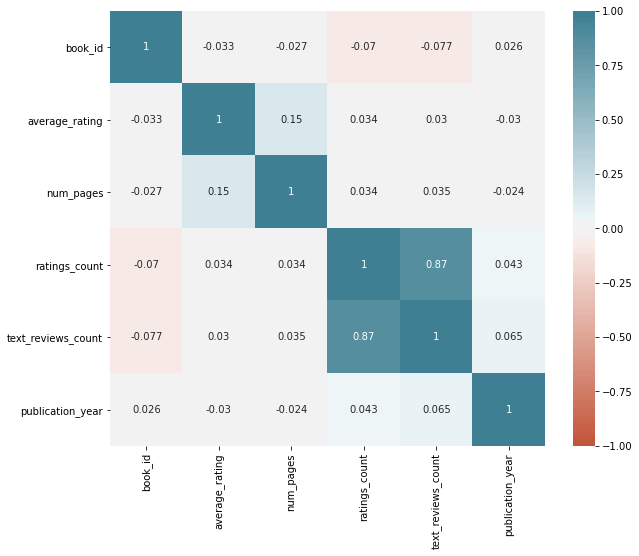

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(
    books_df.corr(), 
    vmin = -1, 
    vmax = 1, 
    center = 0, 
    annot = True, 
    #cmap = 'mako',
    cmap=sns.diverging_palette(20, 220, n=200),
    square = True
)
plt.savefig('heatmap.png', bbox_inches="tight")

<p>50% of the books have less than 750 ratings, while 25% of books have more than 5000 ratings.
    Subsetting the dataset to include books only with 750+ ratings to avoid highly 
    skewed data.</p> 

In [103]:
print(books_df['ratings_count'].describe().apply(lambda x: format(x, 'f')))
books_ratings = books_df[books_df['ratings_count'] > 750]
books_ratings.shape

count      10000.000000
mean       17695.330100
std       112914.548735
min            0.000000
25%          104.000000
50%          752.500000
75%         5019.000000
max      4597666.000000
Name: ratings_count, dtype: object


(5004, 13)

<h4>Top 10 Books by Rating Count</h4>

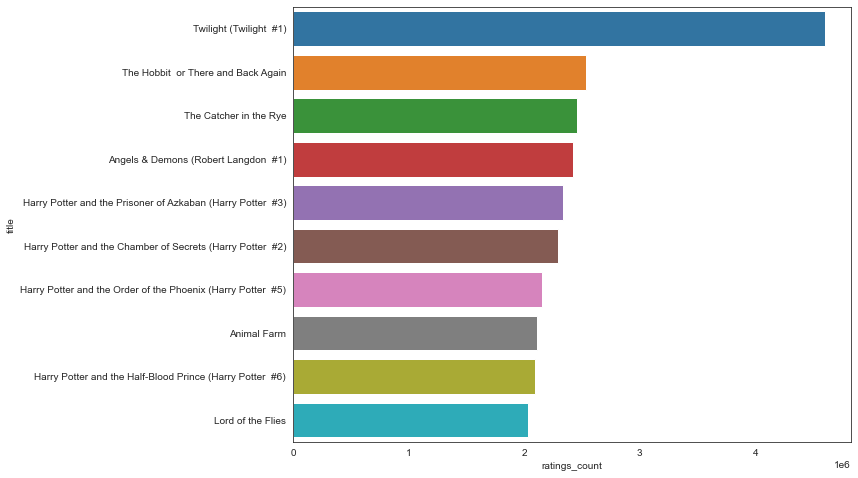

In [113]:
plt.figure(figsize=(10,8))
top10_ratings_count = books_ratings.sort_values(by='ratings_count', ascending=False).head(10)
sns.set_style('white')
sns.barplot(x = top10_ratings_count['ratings_count'], y = top10_ratings_count['title'])

<h4>Top 10 Books by Average Rating</h4>

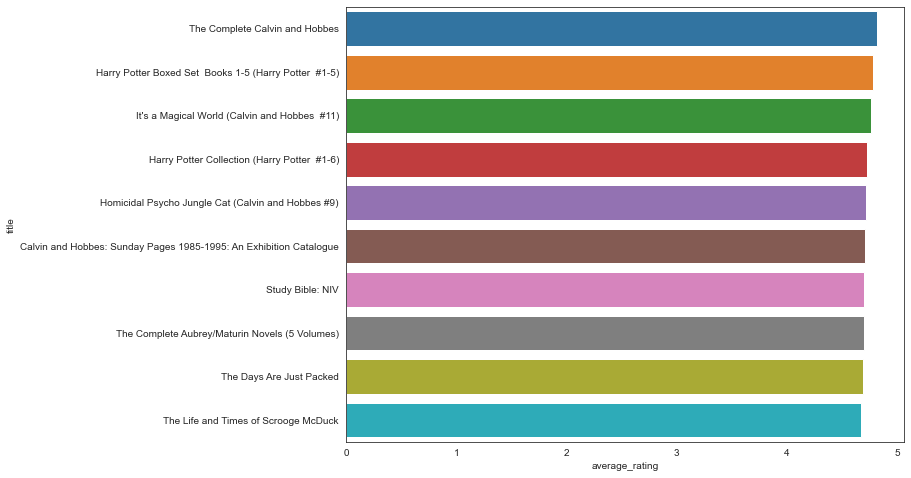

In [120]:
top10_avg_rating = books_df[books_df['ratings_count'] > 750]
top10_avg_rating = top10_avg_rating.sort_values('average_rating', ascending=False).head(10)
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.barplot(x = top10_avg_rating['average_rating'], y = top10_avg_rating['title'])